In [ ]:
import pandas as pd
from transformers import pipeline


file_path = './imdb_reviews_unique.csv'
reviews_df = pd.read_csv(file_path)


sentiment_model = pipeline("sentiment-analysis", truncation=True)


def analyze_sentiment(review):
    max_length = 512
    parts = [review[i:i + max_length] for i in range(0, len(review), max_length)]

    scores = [sentiment_model(part)[0]['score'] for part in parts if part.strip() != '']

    if scores:
        return sum(scores) / len(scores)
    else:
        return 0

reviews_df['Sentiment_Score'] = reviews_df['Review'].apply(analyze_sentiment)


print(reviews_df.head())

output_path = "/content/drive/My Drive/5243data/reviews_df.csv"
reviews_df.to_csv(output_path, index=False)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


                                               Title        Author  \
0                                              bravo        Rage-4   
1  How many times I watch this movie.... It's sti...   TaylorYee94   
2           STANDING OVATION! - (10 stars out of 10)   BJG-Reviews   
3  Despite a lot of plot flaws and conveniences, ...  paulclaassen   
4                                              Great   MrHeraclius   

               Date                                             Review  \
0     9 August 1998  Firstly and foremostly, I am a guy, which (in ...   
1  2 September 2020  I have watched Titanic how many times I don't ...   
2     10 March 2021  The stage curtains open ...Not since the adven...   
3       3 July 2018  Ah, yes, the film that propelled Leonardi DiCa...   
4  23 February 2020  Very beautiful and cinematic movie with lots o...   

   Sentiment_Score  
0         0.995217  
1         0.999821  
2         0.955023  
3         0.969697  
4         0.998823  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


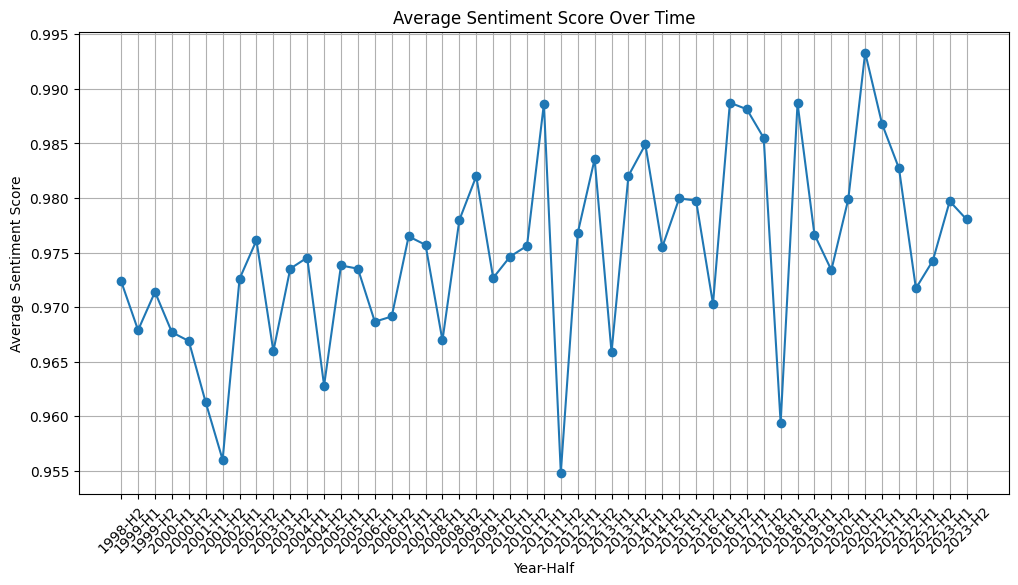

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

reviews_df['Date'] = pd.to_datetime(reviews_df['Date'], errors='coerce')

reviews_df = reviews_df.dropna(subset=['Date'])

reviews_df['Year-Half'] = reviews_df['Date'].apply(lambda x: f"{x.year}-{'H1' if x.month <= 6 else 'H2'}")

score_by_time = reviews_df.groupby('Year-Half')['Sentiment_Score'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(score_by_time['Year-Half'], score_by_time['Sentiment_Score'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Year-Half')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score Over Time')
plt.grid(True)
plt.show()



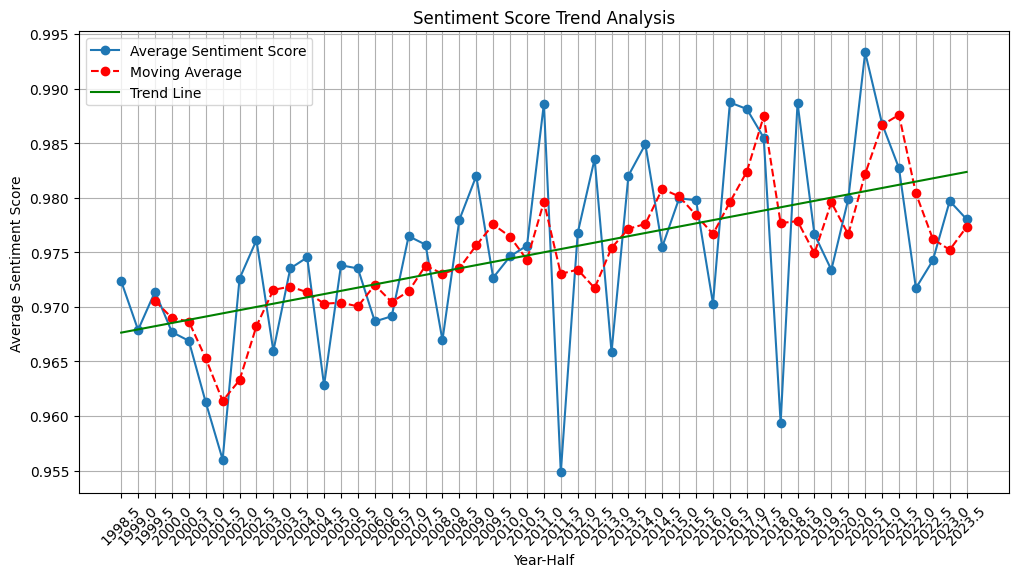

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

reviews_df['Year-Half_Numeric'] = reviews_df['Date'].apply(lambda x: x.year + (0.5 if x.month > 6 else 0))
score_by_time = reviews_df.groupby('Year-Half_Numeric')['Sentiment_Score'].mean().reset_index()

score_by_time['Moving_Avg'] = score_by_time['Sentiment_Score'].rolling(window=3).mean()

X = score_by_time['Year-Half_Numeric'].values.reshape(-1, 1)
y = score_by_time['Sentiment_Score'].values
model = LinearRegression().fit(X, y)
score_by_time['Trend'] = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(score_by_time['Year-Half_Numeric'], score_by_time['Sentiment_Score'], marker='o', label='Average Sentiment Score')
plt.plot(score_by_time['Year-Half_Numeric'], score_by_time['Moving_Avg'], marker='o', linestyle='--', color='red', label='Moving Average')
plt.plot(score_by_time['Year-Half_Numeric'], score_by_time['Trend'], linestyle='-', color='green', label='Trend Line')

plt.xticks(score_by_time['Year-Half_Numeric'], rotation=45)
plt.xlabel('Year-Half')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Score Trend Analysis')
plt.legend()
plt.grid(True)
plt.show()



In [2]:
import pandas as pd

In [5]:
# First, let's load the CSV file and take a look at its structure to understand how to proceed.
csv_file_path = '/content/tille+review.csv'

# We'll use pandas to read the CSV file
df_reviews = pd.read_csv(csv_file_path)

# Displaying the first few rows to understand the structure of the CSV
df_reviews.head()


Title        Author  \
0                                              bravo        Rage-4   
1  How many times I watch this movie.... It's sti...   TaylorYee94   
2           STANDING OVATION! - (10 stars out of 10)   BJG-Reviews   
3  Despite a lot of plot flaws and conveniences, ...  paulclaassen   
4                                              Great   MrHeraclius   

               Date                                             Review  \
0     9 August 1998  Firstly and foremostly, I am a guy, which (in ...   
1  2 September 2020  I have watched Titanic how many times I don't ...   
2     10 March 2021  The stage curtains open ...Not since the adven...   
3       3 July 2018  Ah, yes, the film that propelled Leonardi DiCa...   
4  23 February 2020  Very beautiful and cinematic movie with lots o...   

   Sentiment_Score  
0         0.638083  
1         0.758639  
2         0.810825  
3         0.775845  
4         0.999344

In [6]:
from collections import Counter

# Adjust the range according to your dataset's year range
for start_year in range(df_reviews['Year'].min(), df_reviews['Year'].max(), 5):
    end_year = start_year + 4
    segment_df = df_reviews[(df_reviews['Year'] >= start_year) & (df_reviews['Year'] <= end_year)]
    aggregated_tokens = sum(segment_df['Tokens'].tolist(), [])
    top_words = Counter(aggregated_tokens).most_common(5)
    print(f"Top words for {start_year}-{end_year}: {top_words}")

KeyError: ignored

In [4]:
df_reviews['Sentiment_Score'].min()

0.0002094705899556

In [7]:
# Assuming df_reviews is your DataFrame and it has a column 'Sentiment_Score',
# you can filter the DataFrame to include only rows where the sentiment score is less than 0.5.

# Filter the DataFrame
df_negative = df_reviews[df_reviews['Sentiment_Score'] < 0.2]

df_negative.head()  # Display the first few rows of the filtered DataFrame



Title  \
103             The most over -rated movie ever made .   
111  I took a break from crying uncontrollably to w...   
134  Your heart will go on. We get it. Stop clutter...   
148                     Insultingly pretentious drivel   
177                                              Barf.   

                      Author               Date  \
103  Rectangular_businessman      26 March 2007   
111         lostonthehighway      20 March 2021   
134         RiffRaffMcKinley  21 September 2007   
148  Horrorible_Horror_Films        23 May 2006   
177                    Ed-90   18 December 1998   

                                                Review  Sentiment_Score  
103  Everything about this movie it's garbage . Ina...         0.002735  
111  I never cry at movies.I have only cried at 2 t...         0.093550  
134  This movie is *pitiful.* It is *abominable*. I...         0.177309  
148  Bloated neo-romantic crap are other fine discr...         0.175395  
177  Anyone who has even a glimmer of an idea of la...         0.008523

In [13]:
!pip install spacy==2.3.5
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 17.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached thinc-7.4.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached srsly-1.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (369 kB)
  Using cached catalogue-1.0.2-py2.py3-none-any.whl (16 kB)
  Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for spacy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for spacy
Failed to build spacy
ERROR: Could not build wheels for spacy, which is required to install pyp

In [34]:
import spacy
import string

nlp = spacy.load("en_core_web_sm")

exclude_words = set(['see', 'go','bad','know', 'story', 'film', 'titanic', 'movie', 'good', 'watch', 'ship', 'like', 'love','people','time','think','look','thing','want','make','mean','find','get','well','way','great','truely','completely','james'])

def clean_text(text):
    # Process the text with spaCy
    doc = nlp(text.lower())  # Convert text to lowercase before processing

    # Initialize an empty list to build the cleaned text
    cleaned_text = []

    for token in doc:
        # Lemmatize and check if the lemma is in the exclude list
        lemma = token.lemma_
        if lemma not in exclude_words and not token.is_stop and not token.is_punct and not token.is_digit:
            cleaned_text.append(lemma)

    # Return the cleaned text as a string
    return " ".join(cleaned_text)

# Apply the cleaning function to the DataFrame
df_negative['Cleaned_Review'] = df_negative['Review'].apply(clean_text)


<ipython-input-34-52889b075db2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative['Cleaned_Review'] = df_negative['Review'].apply(clean_text)


In [15]:
df_negative.head()

Title  \
103             The most over -rated movie ever made .   
111  I took a break from crying uncontrollably to w...   
112                        Titanic--Disaster of Dreams   
134  Your heart will go on. We get it. Stop clutter...   
148                     Insultingly pretentious drivel   

                      Author               Date  \
103  Rectangular_businessman      26 March 2007   
111         lostonthehighway      20 March 2021   
112               forrestwrs        29 May 2007   
134         RiffRaffMcKinley  21 September 2007   
148  Horrorible_Horror_Films        23 May 2006   

                                                Review  Sentiment_Score  \
103  Everything about this movie it's garbage . Ina...         0.002735   
111  I never cry at movies.I have only cried at 2 t...         0.093550   
112  There is a lot of obvious hype associated with...         0.254980   
134  This movie is *pitiful.* It is *abominable*. I...         0.177309   
148  Bloated neo-romantic crap are other fine discr...         0.175395   

                                   Review_No_Stopwords  
103  movie garbage . Inane , dull boring gentle wor...  
111  cry movies . cried 2 entire lifetime . , 3.I s...  
112  lot obvious hype associated film . Let face , ...  
134  movie * pitiful . * * abominable * . terms dun...  
148  Bloated neo - romantic crap fine discriptors m...

In [37]:
from collections import Counter

# Tokenize the words in the 'Review_No_Stopwords' column
# We split each review into words and then flatten the list of lists
words = [word for review in df_negative['Cleaned_Review'] for word in review.split()]

# Count the frequencies of each word
word_frequencies = Counter(words)

# Get the most common words
most_common_words = word_frequencies.most_common(20)  # Adjust the number as needed

most_common_words


[('cameron', 144),
 ('effect', 133),
 ('character', 115),
 ('sink', 97),
 ('hour', 94),
 ('special', 93),
 ('jack', 87),
 ('kate', 73),
 ('scene', 71),
 ('winslet', 69),
 ('dicaprio', 69),
 ('class', 65),
 ('rise', 64),
 ('real', 63),
 ('oscar', 62),
 ('acting', 61),
 ('plot', 60),
 ('life', 57),
 ('hate', 55),
 ('girl', 55)]

In [38]:
# Filter the DataFrame
df_positive = df_reviews[df_reviews['Sentiment_Score'] > 0.8]

df_positive.head()  # Display the first few rows of the filtered DataFrame


Title       Author              Date  \
2   STANDING OVATION! - (10 stars out of 10)  BJG-Reviews     10 March 2021   
4                                      Great  MrHeraclius  23 February 2020   
8                                   Timeless    Kingslaay       12 May 2017   
11                Greatest movie of all time  henrycoles9   4 November 2020   
15                           One of the best     bzxkvjvw   4 February 2023   

                                               Review  Sentiment_Score  Year  
2   The stage curtains open ...Not since the adven...         0.810825  2021  
4   Very beautiful and cinematic movie with lots o...         0.999344  2020  
8   Titanic is a true masterpiece and is easily on...         0.978349  2017  
11  Flawless, enchanting, riveting, wondrous, tota...         0.800546  2020  
15  This is one of the best movies in my opinion. ...         0.999141  2023

**Positive Reviews Top Frequency**

In [39]:
import spacy
import string

nlp = spacy.load("en_core_web_sm")

exclude_words = set(['see', 'go','great' ,'know', 'story', 'film', 'titanic', 'movie', 'good', 'watch', 'ship', 'like','people','time','think','look','thing','want','make','mean','find','year','love','james'])

def clean_text(text):
    # Process the text with spaCy
    doc = nlp(text.lower())  # Convert text to lowercase before processing

    # Initialize an empty list to build the cleaned text
    cleaned_text = []

    for token in doc:
        # Lemmatize and check if the lemma is in the exclude list
        lemma = token.lemma_
        if lemma not in exclude_words and not token.is_stop and not token.is_punct and not token.is_digit:
            cleaned_text.append(lemma)

    # Return the cleaned text as a string
    return " ".join(cleaned_text)

# Apply the cleaning function to the DataFrame
df_positive['Cleaned_Review'] = df_positive['Review'].apply(clean_text)


<ipython-input-39-e65a4ab1d96f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['Cleaned_Review'] = df_positive['Review'].apply(clean_text)


In [40]:
from collections import Counter

# Tokenize the words in the 'Review_No_Stopwords' column
# We split each review into words and then flatten the list of lists
words = [word for review in df_positive['Cleaned_Review'] for word in review.split()]

# Count the frequencies of each word
word_frequencies = Counter(words)

# Get the most common words
most_common_words = word_frequencies.most_common(20)  # Adjust the number as needed

most_common_words

[('cameron', 596),
 ('jack', 566),
 ('rise', 467),
 ('kate', 455),
 ('winslet', 435),
 ('dicaprio', 367),
 ('life', 336),
 ('character', 327),
 ('leonardo', 326),
 ('feel', 309),
 ('scene', 297),
 ('heart', 281),
 ('romance', 253),
 ('effect', 249),
 ('amazing', 240),
 ('beautiful', 236),
 ('actor', 228),
 ('real', 204),
 ('end', 195),
 ('performance', 187)]

Negative Reviews Top Frequency over 5 years

In [41]:
df_negative['Year'] = pd.to_datetime(df_reviews['Date']).dt.year
df_negative.head()

<ipython-input-41-8d92a2c2e9f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative['Year'] = pd.to_datetime(df_reviews['Date']).dt.year


Title  \
103             The most over -rated movie ever made .   
111  I took a break from crying uncontrollably to w...   
134  Your heart will go on. We get it. Stop clutter...   
148                     Insultingly pretentious drivel   
177                                              Barf.   

                      Author               Date  \
103  Rectangular_businessman      26 March 2007   
111         lostonthehighway      20 March 2021   
134         RiffRaffMcKinley  21 September 2007   
148  Horrorible_Horror_Films        23 May 2006   
177                    Ed-90   18 December 1998   

                                                Review  Sentiment_Score  Year  \
103  Everything about this movie it's garbage . Ina...         0.002735  2007   
111  I never cry at movies.I have only cried at 2 t...         0.093550  2021   
134  This movie is *pitiful.* It is *abominable*. I...         0.177309  2007   
148  Bloated neo-romantic crap are other fine discr...         0.175395  2006   
177  Anyone who has even a glimmer of an idea of la...         0.008523  1998   

                                        Cleaned_Review  
103  garbage inane dull boring gentle word describe...  
111  cry movies.i cry entire lifetime.well 3.i sob ...  
134  pitiful abominable term dung heap second super...  
148  bloated neo romantic crap fine discriptor hone...  
177  glimmer idea language thought custom turn cent...

In [42]:
from collections import Counter

# Adjust the range according to your dataset's year range
for start_year in range(df_negative['Year'].min(), df_negative['Year'].max(), 5):
    end_year = start_year + 4
    # Use the correct DataFrame to create the Boolean series
    segment_df = df_negative[(df_negative['Year'] >= start_year) & (df_negative['Year'] <= end_year)]

    # Split the reviews into words before aggregating
    aggregated_tokens = [word for review in segment_df['Cleaned_Review'] for word in review.split()]
    top_words = Counter(aggregated_tokens).most_common(5)
    print(f"Top words for {start_year}-{end_year}: {top_words}")


Top words for 1998-2002: [('effect', 92), ('character', 83), ('cameron', 82), ('special', 68), ('hour', 50)]
Top words for 2003-2007: [('cameron', 33), ('jack', 30), ('rise', 29), ('sink', 29), ('kate', 27)]
Top words for 2008-2012: [('action', 11), ('effect', 10), ('real', 10), ('awful', 10), ('sink', 9)]
Top words for 2013-2017: [('cameron', 11), ('scene', 7), ('awful', 4), ('kate', 4), ('long', 4)]
Top words for 2018-2022: [('jack', 20), ('life', 14), ('star', 14), ('sink', 12), ('rise', 11)]


In [43]:
df_positive['Year'] = pd.to_datetime(df_reviews['Date']).dt.year
df_positive.head()

<ipython-input-43-06e258d5d241>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['Year'] = pd.to_datetime(df_reviews['Date']).dt.year


Title       Author              Date  \
2   STANDING OVATION! - (10 stars out of 10)  BJG-Reviews     10 March 2021   
4                                      Great  MrHeraclius  23 February 2020   
8                                   Timeless    Kingslaay       12 May 2017   
11                Greatest movie of all time  henrycoles9   4 November 2020   
15                           One of the best     bzxkvjvw   4 February 2023   

                                               Review  Sentiment_Score  Year  \
2   The stage curtains open ...Not since the adven...         0.810825  2021   
4   Very beautiful and cinematic movie with lots o...         0.999344  2020   
8   Titanic is a true masterpiece and is easily on...         0.978349  2017   
11  Flawless, enchanting, riveting, wondrous, tota...         0.800546  2020   
15  This is one of the best movies in my opinion. ...         0.999141  2023   

                                       Cleaned_Review  
2   stage curtain open advent braveheart enthralle...  
4   beautiful cinematic lot classic scenes.also ex...  
8   true masterpiece easily history cameron outdo ...  
11  flawless enchanting riveting wondrous totally ...  
15  opinion cast amazing sad job execute amazing g...

In [44]:
from collections import Counter

# Adjust the range according to your dataset's year range
for start_year in range(df_positive['Year'].min(), df_positive['Year'].max(), 5):
    end_year = start_year + 4
    # Use the correct DataFrame to create the Boolean series
    segment_df = df_positive[(df_positive['Year'] >= start_year) & (df_positive['Year'] <= end_year)]

    # Split the reviews into words before aggregating
    aggregated_tokens = [word for review in segment_df['Cleaned_Review'] for word in review.split()]
    top_words = Counter(aggregated_tokens).most_common(5)
    print(f"Top words for {start_year}-{end_year}: {top_words}")

Top words for 1998-2002: [('cameron', 134), ('winslet', 87), ('kate', 85), ('dicaprio', 72), ('jack', 65)]
Top words for 2003-2007: [('jack', 148), ('kate', 118), ('winslet', 115), ('cameron', 115), ('rise', 108)]
Top words for 2008-2012: [('jack', 114), ('cameron', 107), ('rise', 96), ('winslet', 71), ('kate', 65)]
Top words for 2013-2017: [('jack', 101), ('rise', 98), ('cameron', 59), ('kate', 58), ('character', 52)]
Top words for 2018-2022: [('cameron', 115), ('kate', 101), ('jack', 86), ('winslet', 86), ('leonardo', 79)]
